In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/scaling_demo_dataset.csv")
df

,age,income,experience_years,target
0,39.967142,55366.810405,1.622289,1
1,33.617357,58411.767896,5.602500,1
2,41.476885,66245.768648,8.020975,1
3,50.230299,65807.030781,8.187922,1
4,32.658466,29334.959481,6.199738,0
...,...,...,...,...
195,38.853174,42962.365218,5.959934,0
196,26.161426,24302.982064,6.920500,0
197,36.537251,70308.085612,4.084945,1
198,35.582087,48281.902321,6.222827,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               200 non-null    float64
 1   income            200 non-null    float64
 2   experience_years  200 non-null    float64
 3   target            200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [ ]:
y=df['target']
x=df.drop('target', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
model=LogisticRegression()

model.fit(x_train, y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test, y_pred)
print("without any scaling:",accuracy)

0.9833333333333333

# Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

$$x'=\frac{x-\mu}{\sigma}$$

In [ ]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 5.78766514e-01,  2.76190961e-01, -1.52162464e+00],
       [-1.04981285e-01,  4.82377166e-01, -5.18095954e-01],
       [ 7.41336446e-01,  1.01284857e+00,  9.16730269e-02],
       [ 1.68390811e+00,  9.83139884e-01,  1.33765444e-01],
       [-2.08235092e-01, -1.48652939e+00, -3.67514555e-01],
       [-2.08217413e-01, -1.03977521e+00,  7.14540148e-01],
       [ 1.74440619e+00,  4.35909197e-01, -9.90329964e-01],
       [ 8.70279710e-01,  4.34640254e-01, -5.72076404e-02],
       [-4.61629869e-01,  4.35921811e-01,  2.07704993e-01],
       [ 6.28133586e-01,  3.82603986e+00,  6.05205583e-01],
       [-4.55107993e-01,  4.92641913e-01,  8.04061210e-01],
       [-4.57597631e-01,  1.06618796e+00, -1.04783735e+00],
       [ 3.04448485e-01,  8.81771756e-01, -1.46079739e+00],
       [-2.01632684e+00,  5.74407302e-01,  1.37494498e+00],
       [-1.81349730e+00, -4.07439208e-01,  4.21529387e-01],
       [-5.61571500e-01,  6.83675296e-01, -6.68477628e-01],
       [-1.04671897e+00, -8.72183278e-01

In [ ]:
x_scaled= pd.DataFrame(x_scaled, columns=x.columns)

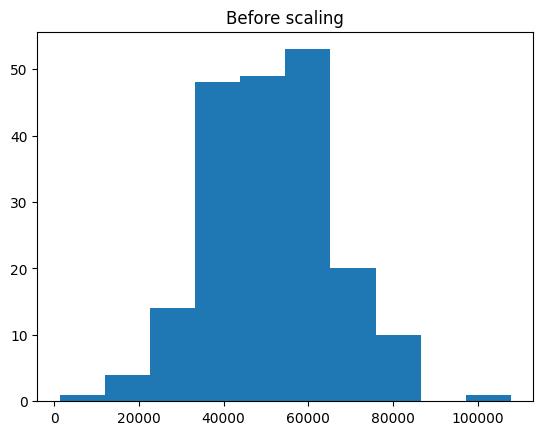

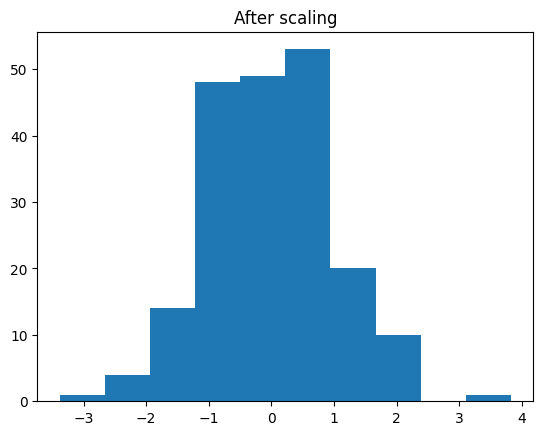

In [ ]:
feature='income'

plt.figure()
plt.hist(x[feature])
plt.title("Before scaling")
plt.show()


feature='income'

plt.figure()
plt.hist(x_scaled[feature])
plt.title("After scaling")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, test_size=0.3, random_state=42)

model=LogisticRegression()

model.fit(x_train, y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test, y_pred)
print("After standard scaling:",accuracy)

After standard scaling: 0.9833333333333333


# MinMax scaling

$$x'=\frac{x-min}{max-min}$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)


In [ ]:
x_scaled

,age,income,experience_years
0,0.583616,0.507338,0.158042
1,0.464704,0.535953,0.337314
2,0.611889,0.609574,0.446244
3,0.775813,0.605451,0.453763
4,0.446747,0.262701,0.364214
...,...,...,...
195,0.562755,0.390766,0.353413
196,0.325078,0.215412,0.396678
197,0.519385,0.647750,0.268962
198,0.501498,0.440757,0.365254


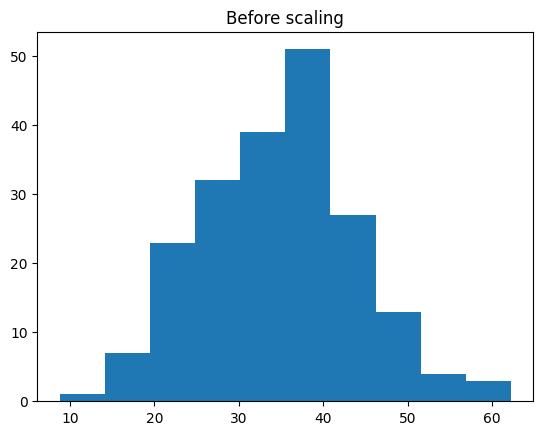

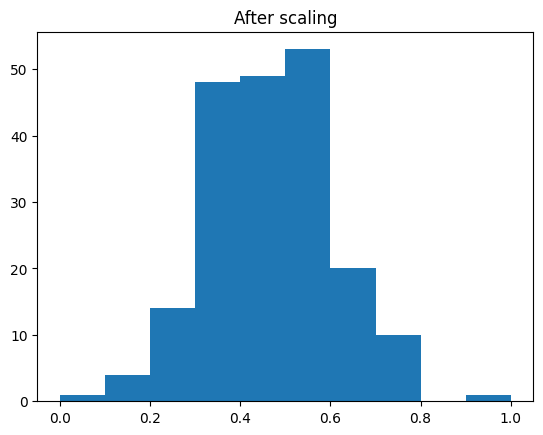

In [ ]:
feature='age'

plt.figure()
plt.hist(x[feature])
plt.title("Before scaling")
plt.show()


feature='income'

plt.figure()
plt.hist(x_scaled[feature])
plt.title("After scaling")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, test_size=0.3, random_state=42)

model=LogisticRegression()

model.fit(x_train, y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test, y_pred)
print("After minmax scaling:",accuracy)

After minmax scaling: 0.8166666666666667


# Robust scaling

$$x'=\frac{x-median}{IQR}$$

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()

In [ ]:
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)

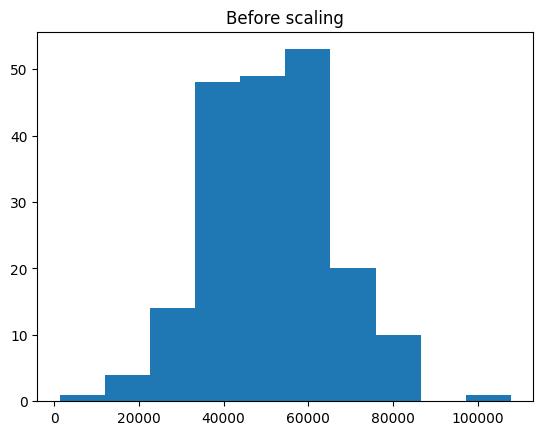

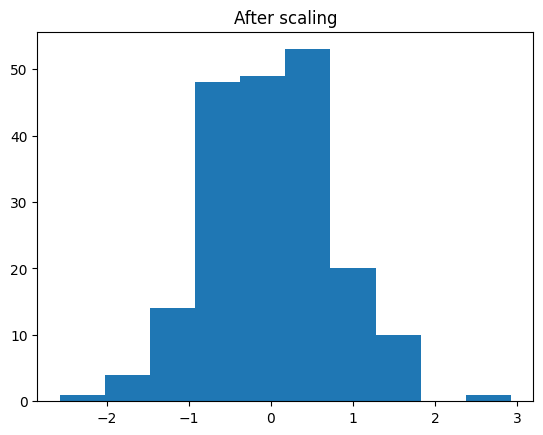

In [ ]:
feature='income'

plt.figure()
plt.hist(x[feature])
plt.title("Before scaling")
plt.show()


feature='income'

plt.figure()
plt.hist(x_scaled[feature])
plt.title("After scaling")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, test_size=0.3, random_state=42)

model=LogisticRegression()

model.fit(x_train, y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test, y_pred)
print("After robust scaling:",accuracy)

After robust scaling: 0.9833333333333333
